In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
import warnings
warnings.filterwarnings("ignore")

In [20]:
with open('team_name_correction.json', 'r') as f:
    team_name_correction = json.load(f)

In [22]:
df=pd.read_csv("deliveries.csv")
df=df.replace(team_name_correction)

In [23]:
df.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batter', 'bowler', 'non_striker', 'batsman_runs', 'extra_runs',
       'total_runs', 'extras_type', 'is_wicket', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

#####  Successful opening Partnership 

In [ ]:


partnerships = df.groupby(["batter", "non_striker"])["total_runs"].sum().reset_index()
partnerships = partnerships.sort_values(by="total_runs", ascending=False)
print(partnerships.head(10))  


              batter     non_striker  total_runs
324   AB de Villiers         V Kohli        1623
1477        CH Gayle         V Kohli        1617
8499         V Kohli  AB de Villiers        1511
1795       DA Warner        S Dhawan        1420
8509         V Kohli        CH Gayle        1185
6798      RV Uthappa       G Gambhir        1077
8519         V Kohli    F du Plessis        1050
2918    Ishan Kishan       RG Sharma         992
2361    F du Plessis         V Kohli         982
6995        S Dhawan       DA Warner         937


#####  Average Powerplay Runs

In [25]:
powerplay = df[df["over"] <= 6].groupby(["match_id", "batting_team"])["total_runs"].sum().reset_index()
avg_powerplay = powerplay.groupby("batting_team")["total_runs"].mean().reset_index()
avg_powerplay = avg_powerplay.sort_values(by="total_runs", ascending=False)
print(avg_powerplay)


                   batting_team  total_runs
2                Gujarat Titans   57.626667
1                Delhi Capitals   55.003968
7                  Punjab Kings   54.983740
3          Kochi Tuskers Kerala   54.928571
11          Sunrisers Hyderabad   54.704280
4         Kolkata Knight Riders   54.310757
5          Lucknow Super Giants   53.522727
8              Rajasthan Royals   53.518182
6                Mumbai Indians   53.421456
0           Chennai Super Kings   53.295359
10  Royal Challengers Bengaluru   52.635294
9       Rising Pune Supergiants   50.160000


#####  Wickets Per Over

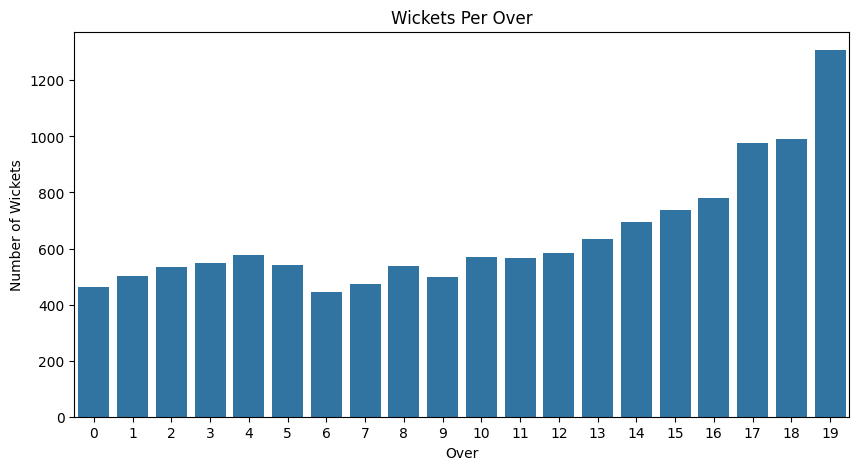

In [8]:
wicket_stats = df[df["is_wicket"] == 1].groupby("over")["is_wicket"].count().reset_index()
plt.figure(figsize=(10, 5))
sns.barplot(x=wicket_stats["over"], y=wicket_stats["is_wicket"])
plt.title("Wickets Per Over")
plt.xlabel("Over")
plt.ylabel("Number of Wickets")
plt.show()


#####  4s vs 6s perTeam

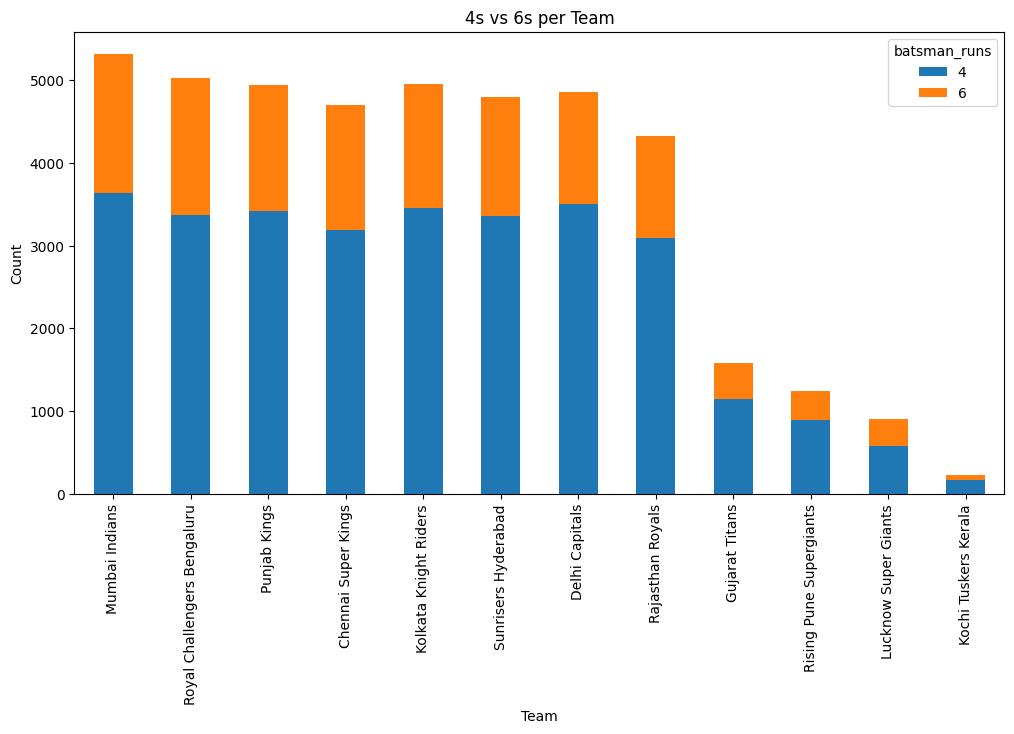

In [29]:
boundaries = df[df["batsman_runs"].isin([4, 6])].groupby(["batting_team", "batsman_runs"])["batsman_runs"].count().unstack().sort_values(by=6, ascending=False)
boundaries.plot(kind="bar", stacked=True, figsize=(12, 6))
plt.title("4s vs 6s per Team")
plt.xlabel("Team")
plt.ylabel("Count")
plt.show()


#####  No of Catch Dismissal by a bowler

In [11]:
caught_outs = df[df["dismissal_kind"] == "caught"].groupby("bowler")["player_dismissed"].count().reset_index()
caught_outs = caught_outs.sort_values(by="player_dismissed", ascending=False)
print(caught_outs.head(10))  


        bowler  player_dismissed
95    DJ Bravo               143
430  YS Chahal               127
57     B Kumar               122
294   R Ashwin               117
405   UT Yadav               108
161  JJ Bumrah               108
132   HV Patel               107
242  MM Sharma               102
6     A Mishra               102
178   K Rabada                97


#####  Average Wickets Fall per 5-over Interval

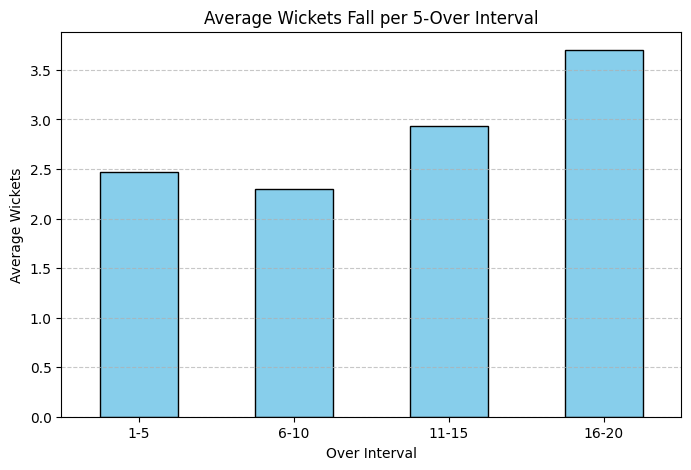

In [ ]:
wickets_df = df[df['is_wicket'] == 1]
wickets_df['over_interval'] = pd.cut(wickets_df['over'], bins=[0, 5, 10, 15, 20], labels=['1-5', '6-10', '11-15', '16-20'])
avg_wickets_per_over = wickets_df.groupby('over_interval').size() / df['match_id'].nunique()
plt.figure(figsize=(8, 5))
avg_wickets_per_over.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Average Wickets Fall per 5-Over Interval')
plt.xlabel('Over Interval')
plt.ylabel('Average Wickets')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#####  Top 10 Bowlers by Economy Rate

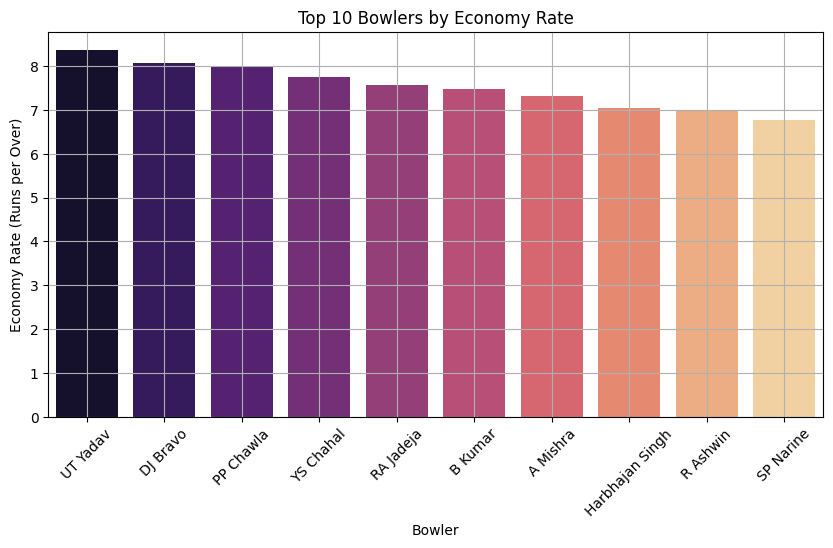

In [28]:
bowler_stats = (
    df.groupby("bowler")
    .agg(runs_conceded=("total_runs", "sum"), balls_bowled=("ball", "count"))
    .reset_index()
)

bowler_stats["overs_bowled"] = bowler_stats["balls_bowled"] / 6
bowler_stats["economy_rate"] = bowler_stats["runs_conceded"] / bowler_stats["overs_bowled"]
top_bowlers = bowler_stats.sort_values("overs_bowled", ascending=False).head(10)
top_bowlers=top_bowlers.sort_values(by="economy_rate", ascending=False)
plt.figure(figsize=(10, 5))
sns.barplot(data=(top_bowlers), x="bowler", y="economy_rate", palette="magma")
plt.xlabel("Bowler")
plt.ylabel("Economy Rate (Runs per Over)")
plt.title("Top 10 Bowlers by Economy Rate")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()
